 # Dog or Cat Classification using Convolutional Neural Network

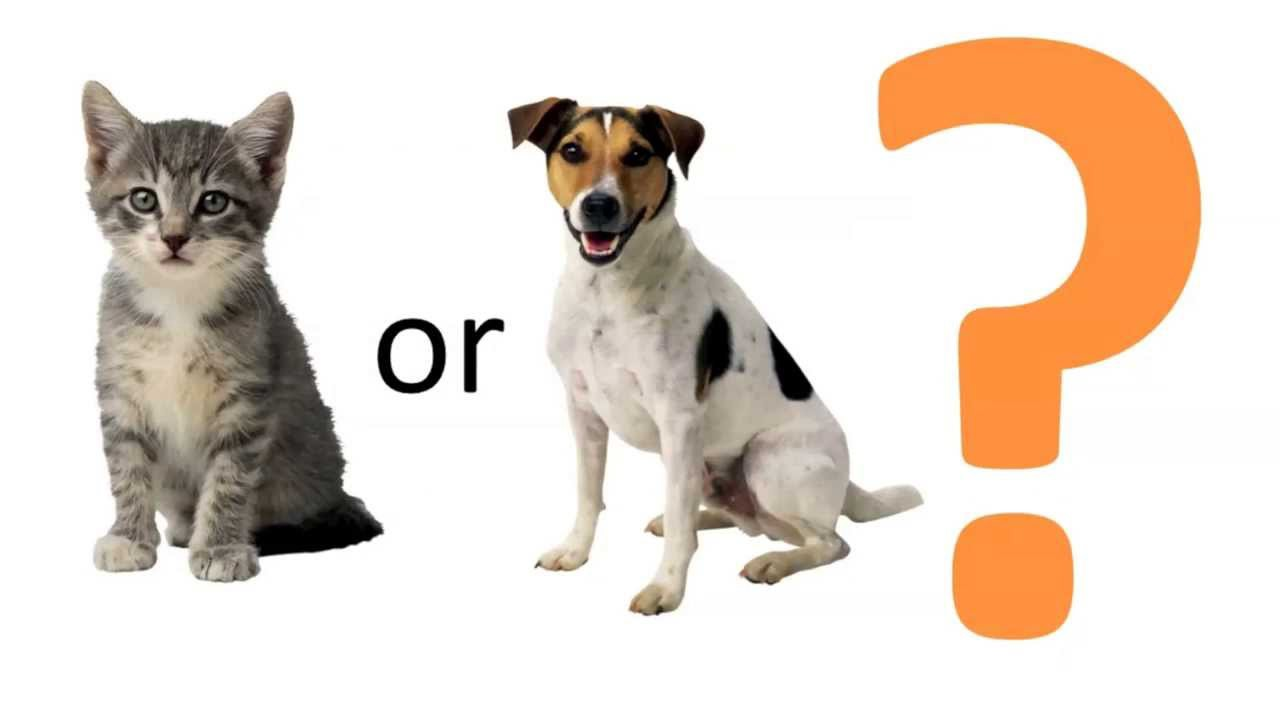

Cats and Dogs Classification
The Asirra (animal species image recognition for restricting access) dataset was introduced in 2013 for a machine learning competition. The dataset includes 25,000 images with equal numbers of labels for cats and dogs.

Dataset: Cats and Dogs dataset

Import Libraries

There are basically 4 type of libraries which you have to import

__Pandas__ :- For reading / writing data

__Matplotlib__ to display images

__Tensorflow Keras models__ :- Need a model to predict right !!

__Tensorflow Keras layers__ :- Every NN needs layers and CNN needs well a couple of layers.

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 97% 526M/544M [00:03<00:00, 170MB/s]
100% 544M/544M [00:03<00:00, 168MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 31.1MB/s]
 91% 247M/271M [00:01<00:00, 210MB/s]
100% 271M/271M [00:01<00:00, 199MB/s]


## Given data is in Zip format. So first we have to unzip the files

In [4]:
!unzip "/content/train.zip"
!unzip "/content/test.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: test/5499.jpg           
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            

## Import the libraries:

In [29]:
import os
import zipfile
import random
import shutil
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset into Train and Test

In [6]:
DIR_TRAIN = "/content/train"
DIR_TEST = "/content/test"

## Checking Data Format

In [7]:
imgs = os.listdir(DIR_TRAIN) 
test_imgs = os.listdir(DIR_TEST)

print(imgs[:5])
print(test_imgs[:5])

['cat.4809.jpg', 'cat.11244.jpg', 'cat.1376.jpg', 'cat.4505.jpg', 'cat.3045.jpg']
['6538.jpg', '10925.jpg', '6438.jpg', '8435.jpg', '5141.jpg']


## Class Distribution of Dog and Cat

In [8]:
dogs_list = [img for img in imgs if img.split(".")[0] == "dog"]
cats_list = [img for img in imgs if img.split(".")[0] == "cat"]

print("No of Dogs Images: ",len(dogs_list))
print("No of Cats Images: ",len(cats_list))

class_to_int = {"dog" : 0, "cat" : 1}
int_to_class = {0 : "dog", 1 : "cat"}

No of Dogs Images:  12500
No of Cats Images:  12500


In [9]:

filenames=os.listdir("train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [10]:
df.head()

,filename,category
0,cat.4809.jpg,0
1,cat.11244.jpg,0
2,cat.1376.jpg,0
3,cat.4505.jpg,0
4,cat.3045.jpg,0


In [11]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

## Visualize some Random Images from Training set

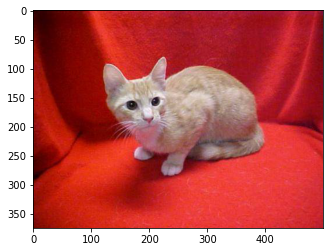

In [12]:
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)

## Transforms for image -augmentations


In [13]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [16]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Generator work

In [18]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


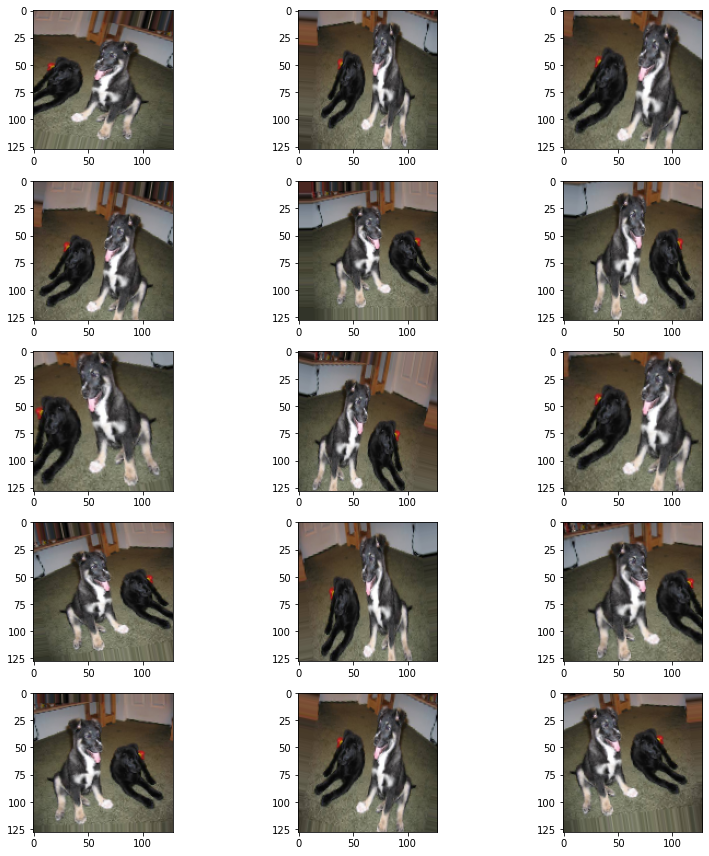

In [19]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Build Model

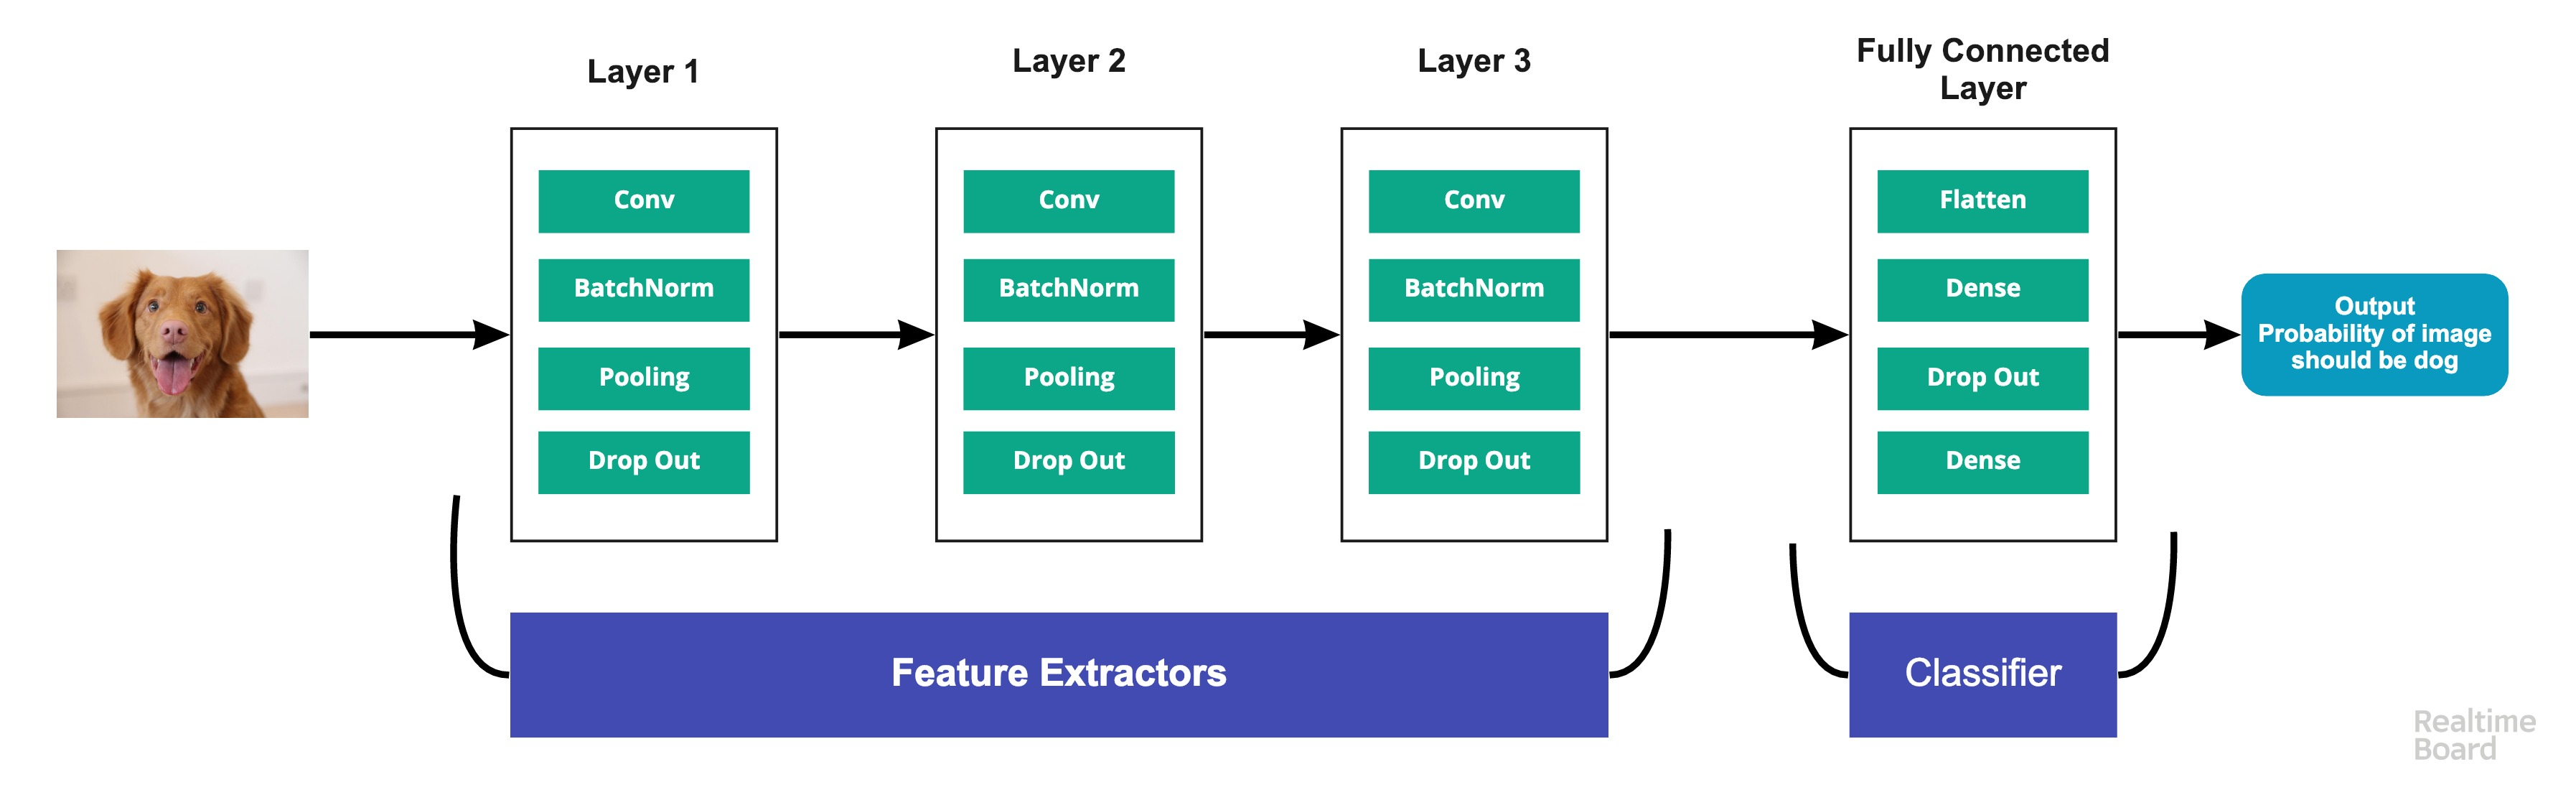

In [22]:
model=Sequential()


model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))


In [23]:
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

## Model summary

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)       

## Fit Model

In [25]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size
)

Epoch 1/10
1333/1333 [==============================] - 187s 104ms/step - loss: 0.9567 - accuracy: 0.5873 - val_loss: 0.6080 - val_accuracy: 0.6821
Epoch 2/10
1333/1333 [==============================] - 139s 104ms/step - loss: 0.5838 - accuracy: 0.6988 - val_loss: 0.8738 - val_accuracy: 0.6763
Epoch 3/10
1333/1333 [==============================] - 138s 104ms/step - loss: 0.5325 - accuracy: 0.7412 - val_loss: 0.8658 - val_accuracy: 0.6240
Epoch 4/10
1333/1333 [==============================] - 138s 104ms/step - loss: 0.4736 - accuracy: 0.7801 - val_loss: 0.5578 - val_accuracy: 0.7395
Epoch 5/10
1333/1333 [==============================] - 139s 104ms/step - loss: 0.4481 - accuracy: 0.7970 - val_loss: 0.7786 - val_accuracy: 0.6951
Epoch 6/10
1333/1333 [==============================] - 136s 102ms/step - loss: 0.4299 - accuracy: 0.8060 - val_loss: 0.5460 - val_accuracy: 0.7526
Epoch 7/10
1333/1333 [==============================] - 138s 103ms/step - loss: 0.4079 - accuracy: 0.8149 - val_

## Save Model

## Virtualize Training

No handles with labels found to put in legend.


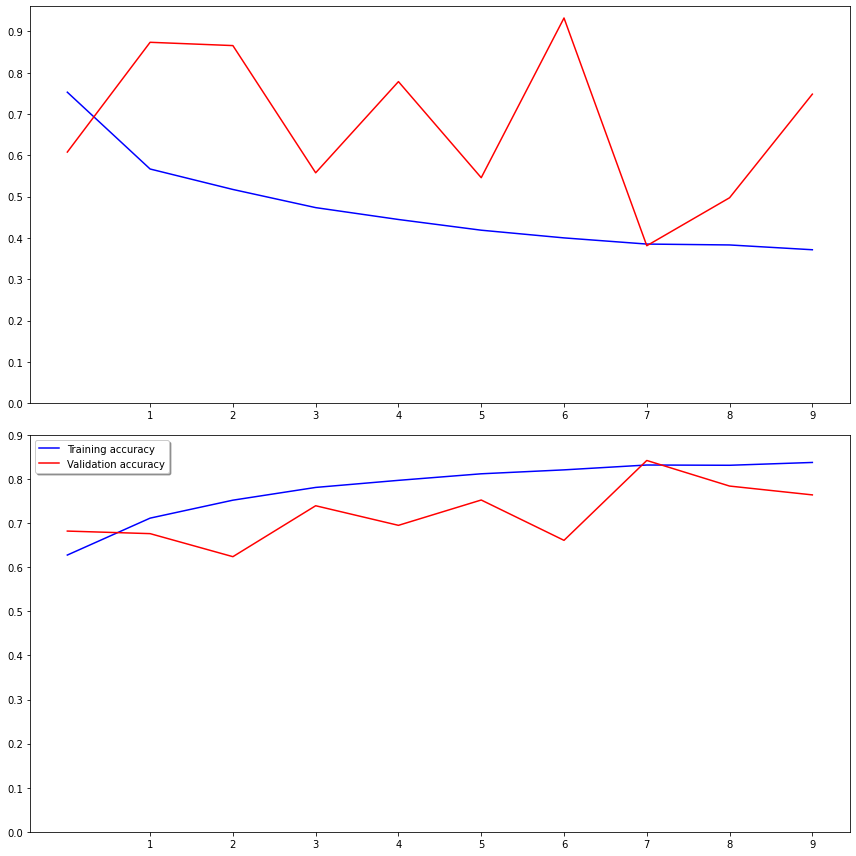

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [43]:
test_filenames = os.listdir("test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [45]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=Image_Size,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


## Predict

In [46]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [60]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [61]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

## predicted result with images

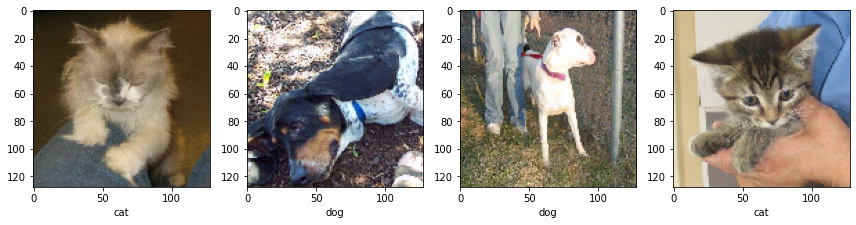

In [76]:
sample_test = test_df.head(4)
sample_test.head()
plt.figure(figsize=(12, 10))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test/"+filename, target_size=Image_Size)
    plt.subplot(1, 4, index+1)
    plt.imshow(img)
    plt.xlabel("{}".format(category))
plt.tight_layout()
plt.show()

# Test Model performance on custom data:

In [83]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("/content/test/100.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

1 dog
